<a href="https://colab.research.google.com/github/jesvin1/Options/blob/master/Option_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

People or institutions selling options are called option
writers. Those buying options are called option holders.

For a European call option on an index with strike 8,000 and index level of 8,200
at maturity, the option holder receives the difference 8,200 − 8,000 = 200 (e.g. in EUR or
USD) from the option writer. If the index level is below the strike, say at 7,800, the option
expires worthless and the writer does not have to pay anything. We can formalize this via
the so-called inner value (or intrinsic value or payoff)—from the holder’s viewpoint—of
the option

hT(S, K) = max[ST− K, 0]

where T is the maturity date of the option, 
      ST the index level at this date and K represents the
strike price. 

We can now use Python for the first time and plot this inner value function.


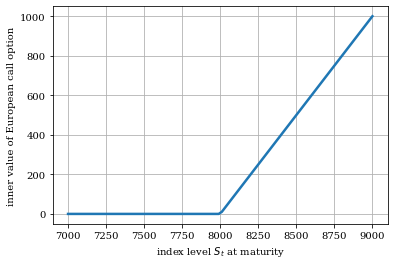

In [0]:
#
# European Call Option Inner Value Plot
# 02_MBV/inner_value_plot.py
#
# (c) Dr. Yves J. Hilpisch
# Derivatives Analytics with Python
#
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'

# Option Strike
K = 8000
# Graphical Output
S = np.linspace(7000, 9000, 100)# index level values
h = np.maximum(S - K, 0)# inner values of call option
plt.figure()
plt.plot(S, h, lw=2.5)# plot inner values at maturity
plt.xlabel('index level $S_t$ at maturity')
plt.ylabel('inner value of European call option')
plt.grid(True)


Three scenarios have to be distinguished with regard to the so-called moneyness of an
option:

in-the-money (ITM): a call (put) is in-the-money if S > K (S < K)

at-the-money (ATM): an option, call or put, is at-the-money if S ≈ K

out-of-the-money (OTM): a call (put) is out-of-the-money if S < K (S > K)

Factors affecting Option

1. initial index level
2. volatility of the index
3. time-to-maturity
4. interest rate

These above insights are formalized in the seminal work of Black-Scholes-Merton (cf.
Black and Scholes (1973) and Merton (1973)) who for the first time derived a closed option
pricing formula for a parsimonious set of input parameters. Their formula says mainly the
following

C∗
 = CBSM(S0, K, T, r, 𝜎)

1. S0the current index level
2. K the strike price of the option
3. T the maturity date (equals time-to-maturity viewed from the present date)
4. r the constant risk-less short rate
5. 𝜎 the volatility of the index, i.e. the standard deviation of the index level returns

So we can say option’s present value is composed of the inner value plus the time value







In [0]:
#!git clone https://github.com/yhilpisch/dawp.git
#%cd dawp
#conda env create -f dawp_conda.yml
#!source activate dawp
#%cd python36


/bin/bash: conda: command not found


In [0]:
#%cd ..
!pwd
!ls

/content
sample_data


In [0]:
!pip install git+https://github.com/yhilpisch/dawp.git

  Cloning https://github.com/yhilpisch/dawp.git to /tmp/pip-req-build-r8wxmc0q
  Running command git clone -q https://github.com/yhilpisch/dawp.git /tmp/pip-req-build-r8wxmc0q
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [0]:
#
# Black-Scholes-Merton (1973) European Call & Put Valuation
# 05_com/BSM_option_valuation.py
#
# (c) Dr. Yves J. Hilpisch
# Derivatives Analytics with Python
#
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import quad
mpl.rcParams['font.family'] = 'serif'

#
# Helper Functions
#


def dN(x):
    ''' Probability density function of standard normal random variable x. '''
    return math.exp(-0.5 * x ** 2) / math.sqrt(2 * math.pi)


def N(d):
    ''' Cumulative density function of standard normal random variable x. '''
    return quad(lambda x: dN(x), -20, d, limit=50)[0]


def d1f(St, K, t, T, r, sigma):
    ''' Black-Scholes-Merton d1 function.
        Parameters see e.g. BSM_call_value function. '''
    d1 = (math.log(St / K) + (r + 0.5 * sigma ** 2)
          * (T - t)) / (sigma * math.sqrt(T - t))
    return d1

#
# Valuation Functions
#


def BSM_call_value(St, K, t, T, r, sigma):
    ''' Calculates Black-Scholes-Merton European call option value.
    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    Returns
    =======
    call_value : float
        European call present value at t
    '''
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 - sigma * math.sqrt(T - t)
    call_value = St * N(d1) - math.exp(-r * (T - t)) * K * N(d2)
    return call_value


def BSM_put_value(St, K, t, T, r, sigma):
    ''' Calculates Black-Scholes-Merton European put option value.
    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    Returns
    =======
    put_value : float
        European put present value at t
    '''
    put_value = BSM_call_value(St, K, t, T, r, sigma) \
        - St + math.exp(-r * (T - t)) * K
    return put_value


#
# Plotting European Option Values
#


def plot_values(function):
    ''' Plots European option values for different parameters c.p. '''
    plt.figure(figsize=(10, 8.3))
    points = 100
    #
    # Model Parameters
    #
    St = 100.0  # index level
    K = 100.0  # option strike
    t = 0.0  # valuation date
    T = 1.0  # maturity date
    r = 0.05  # risk-less short rate
    sigma = 0.2  # volatility

    # C(K) plot
    plt.subplot(221)
    klist = np.linspace(80, 120, points)
    vlist = [function(St, K, t, T, r, sigma) for K in klist]
    plt.plot(klist, vlist)
    plt.grid()
    plt.xlabel('strike $K$')
    plt.ylabel('present value')

    # C(T) plot
    plt.subplot(222)
    tlist = np.linspace(0.0001, 1, points)
    vlist = [function(St, K, t, T, r, sigma) for T in tlist]
    plt.plot(tlist, vlist)
    plt.grid(True)
    plt.xlabel('maturity $T$')

    # C(r) plot
    plt.subplot(223)
    rlist = np.linspace(0, 0.1, points)
    vlist = [function(St, K, t, T, r, sigma) for r in rlist]
    plt.plot(tlist, vlist)
    plt.grid(True)
    plt.xlabel('short rate $r$')
    plt.ylabel('present value')
    plt.axis('tight')

    # C(sigma) plot
    plt.subplot(224)
    slist = np.linspace(0.01, 0.5, points)
    vlist = [function(St, K, t, T, r, sigma) for sigma in slist]
    plt.plot(slist, vlist)
    plt.grid(True)
    plt.xlabel('volatility $\sigma$')
    plt.tight_layout()

Text(0, 0.5, 'present value $C(t=0)$')

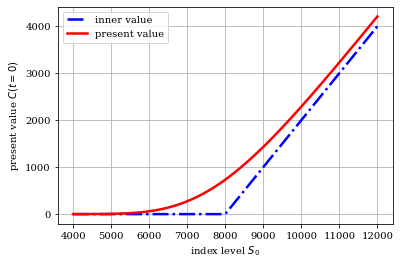

In [0]:
#
# European Call Option Value Plot
# 02_mbv/BSM_value_plot.py
#
# (c) Dr. Yves J. Hilpisch
# Derivatives Analytics with Python
#
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'
# Import Valuation Function from Chapter 5
import sys
sys.path.append('05_com')
#from BSM_option_valuation import BSM_call_value
# Model and Option Parameters
K = 8000# strike price
T = 1.0# time-to-maturity
r = 0.025# constant, risk-less short rate
vol = 0.2# constant volatility
# Sample Data Generation
S = np.linspace(4000, 12000, 150)# vector of index level values
h = np.maximum(S - K, 0)# inner value of option
C = [BSM_call_value(S0, K, 0, T, r, vol) for S0 in S]
# calculate call option values
# Graphical Output
plt.figure()
plt.plot(S, h, 'b-.', lw=2.5, label='inner value')
# plot inner value at maturity
plt.plot(S, C, 'r', lw=2.5, label='present value')
# plot option present value
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('index level $S_0$')
plt.ylabel('present value $C(t=0)$')


VANILLA VS. EXOTIC INSTRUMENTS

 plain vanilla or flow equity derivatives, like European
call options written on an equity index

 exotic equity derivatives, like options on an equity
index with Asian features, barriers and/or American exercise.

 exist liquid
markets for plain vanilla products but not for exotic ones




Stylized Facts


“A set of [statistical] properties, common across many instruments, markets and time
periods, has been observed by independent studies and classified as ‘stylized facts’.”

stochastic volatility: volatility is neither constant nor deterministic; there is no mechanism
to forecast volatility at a high confidence level
�volatility clustering: empirical data suggests that high volatility events seem to cluster
in time; there is often a positive autocorrelation of volatility measures

�volatility mean reversion: volatility is a mean-reverting quantity—it never reaches zero
nor does it go to infinity; however, the mean can change over time

�leverage effect: studies suggest that volatility is negatively correlated with asset returns;
if return measures increase, volatility measures often decrease and vice versa

�fat tails: compared to a normal distribution large positive and negative index returns are
more frequent

�jumps: index levels may move by magnitudes that cannot be explained within a Gaussian,
i.e. normal, diffusion setting; some jump component may be necessary to explain certain
large moves



In [2]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=77d5f81871461afd3a9f36cef7e2f6caff1cc3181377cc34b459afc9bbcbec01
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
#
# Analyzing Returns from Geometric Brownian Motion
# 03_stf/GBM_returns.py
#
# (c) Dr. Yves J. Hilpisch
# Derivatives Analytics with Python
#
import math
import numpy as np
import pandas as pd
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'

#
# Helper Function
#


def dN(x, mu, sigma):
    ''' Probability density function of a normal random variable x.

    Parameters
    ==========
    mu : float
        expected value
    sigma : float
        standard deviation

    Returns
    =======
    pdf : float
        value of probability density function
    '''
    z = (x - mu) / sigma
    pdf = np.exp(-0.5 * z ** 2) / math.sqrt(2 * math.pi * sigma ** 2)
    return pdf


#
# Simulate a Number of Years of Daily Stock Quotes
#


def simulate_gbm():
    # model parameters
    S0 = 100.0  # initial index level
    T = 10.0  # time horizon
    r = 0.05  # risk-less short rate
    vol = 0.2  # instantaneous volatility

    # simulation parameters
    np.random.seed(250000)
    gbm_dates = pd.DatetimeIndex(start='30-09-2004',
                                 end='30-09-2014',
                                 freq='B')
    M = len(gbm_dates)  # time steps
    I = 1  # index level paths
    dt = 1 / 252.  # fixed for simplicity
    df = math.exp(-r * dt)  # discount factor

    # stock price paths
    rand = np.random.standard_normal((M, I))  # random numbers
    S = np.zeros_like(rand)  # stock matrix
    S[0] = S0  # initial values
    for t in range(1, M):  # stock price paths
        S[t] = S[t - 1] * np.exp((r - vol ** 2 / 2) * dt +
                                 vol * rand[t] * math.sqrt(dt))

    gbm = pd.DataFrame(S[:, 0], index=gbm_dates, columns=['index'])
    gbm['returns'] = np.log(gbm['index'] / gbm['index'].shift(1))

    # Realized Volatility (eg. as defined for variance swaps)
    gbm['rea_var'] = 252 * np.cumsum(gbm['returns'] ** 2) / np.arange(len(gbm))
    gbm['rea_vol'] = np.sqrt(gbm['rea_var'])
    gbm = gbm.dropna()
    return gbm

def generate_index():
    import yfinance as yf
    import datetime as datetime
    # sets the sample period as 5 years back from 09/12/2019
    end = datetime.datetime(2020, 3, 12)
    start = end - datetime.timedelta(days = 15*365)

    gbm = yf.Ticker('^NSEI')
    gbm = pd.DataFrame(gbm.history(start = start, end = end)['Close'])
    gbm = gbm.rename(columns={'Close':'index'})

    gbm['returns'] = np.log(gbm['index'] / gbm['index'].shift(1))

    # Realized Volatility (eg. as defined for variance swaps)
    gbm['rea_var'] = 252 * np.cumsum(gbm['returns'] ** 2) / np.arange(len(gbm))
    gbm['rea_vol'] = np.sqrt(gbm['rea_var'])
    gbm = gbm.dropna()

    print_statistics(gbm)
    quotes_returns(gbm)
    return_histogram(gbm)
    return_qqplot(gbm)
    realized_volatility(gbm)
    rolling_statistics(gbm)

    return gbm

# Return Sample Statistics and Normality Tests


def print_statistics(data):
    print("RETURN SAMPLE STATISTICS")
    print("---------------------------------------------")
    print("Mean of Daily  Log Returns %9.6f" % np.mean(data['returns']))
    print("Mean of Annua. Log Returns %9.6f" %
          (np.mean(data['returns']) * 252))
    print("Std  of Annua. Log Returns %9.6f" %
          (np.std(data['returns']) * math.sqrt(252)))
    print("---------------------------------------------")
    print("Skew of Sample Log Returns %9.6f" % scs.skew(data['returns']))
    print("Skew Normal Test p-value   %9.6f" %
          scs.skewtest(data['returns'])[1])
    print("---------------------------------------------")
    print("Kurt of Sample Log Returns %9.6f" % scs.kurtosis(data['returns']))
    print("Kurt Normal Test p-value   %9.6f" %
          scs.kurtosistest(data['returns'])[1])
    print("---------------------------------------------")
    print("Normal Test p-value        %9.6f" %
          scs.normaltest(data['returns'])[1])
    print("---------------------------------------------")
    print("Realized Volatility        %9.6f" % data['rea_vol'].iloc[-1])
    print("Realized Variance          %9.6f" % data['rea_var'].iloc[-1])

#
# Graphical Output
#

# daily quotes and log returns


def quotes_returns(data):
    ''' Plots quotes and returns. '''
    plt.figure(figsize=(9, 6))
    plt.subplot(211)
    data['index'].plot()
    plt.ylabel('daily quotes')
    plt.grid(True)
    plt.axis('tight')

    plt.subplot(212)
    data['returns'].plot()
    plt.ylabel('daily log returns')
    plt.grid(True)
    plt.axis('tight')

# histogram of annualized daily log returns


def return_histogram(data):
    ''' Plots a histogram of the returns. '''
    plt.figure(figsize=(9, 5))
    x = np.linspace(min(data['returns']), max(data['returns']), 100)
    plt.hist(np.array(data['returns']), bins=50, normed=True)
    y = dN(x, np.mean(data['returns']), np.std(data['returns']))
    plt.plot(x, y, linewidth=2)
    plt.xlabel('log returns')
    plt.ylabel('frequency/probability')
    plt.grid(True)

# Q-Q plot of annualized daily log returns


def return_qqplot(data):
    ''' Generates a Q-Q plot of the returns.'''
    plt.figure(figsize=(9, 5))
    sm.qqplot(data['returns'], line='s')
    plt.grid(True)
    plt.xlabel('theoretical quantiles')
    plt.ylabel('sample quantiles')


# realized volatility
def realized_volatility(data):
    ''' Plots the realized volatility. '''
    plt.figure(figsize=(9, 5))
    data['rea_vol'].plot()
    plt.ylabel('realized volatility')
    plt.grid(True)

# mean return, volatility and correlation (252 days moving = 1 year)


def rolling_statistics(data):
    ''' Calculates and plots rolling statistics (mean, std, correlation). '''
    plt.figure(figsize=(11, 8))

    plt.subplot(311)
    mr = data['returns'].rolling(252).mean() * 252
    mr.plot()
    plt.grid(True)
    plt.ylabel('returns (252d)')
    plt.axhline(mr.mean(), color='r', ls='dashed', lw=1.5)

    plt.subplot(312)
    vo = data['returns'].rolling(252).std() * math.sqrt(252)
    vo.plot()
    plt.grid(True)
    plt.ylabel('volatility (252d)')
    plt.axhline(vo.mean(), color='r', ls='dashed', lw=1.5)
    vx = plt.axis()

    plt.subplot(313)
    co = mr.rolling(252).corr(vo)
    co.plot()
    plt.grid(True)
    plt.ylabel('correlation (252d)')
    cx = plt.axis()
    plt.axis([vx[0], vx[1], cx[2], cx[3]])
    plt.axhline(co.mean(), color='r', ls='dashed', lw=1.5)


In [10]:
dt = simulate_gbm()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.


RETURN SAMPLE STATISTICS
---------------------------------------------
Mean of Daily  Log Returns  0.000277
Mean of Annua. Log Returns  0.069868
Std  of Annua. Log Returns  0.218688
---------------------------------------------
Skew of Sample Log Returns  0.123828
Skew Normal Test p-value    0.005331
---------------------------------------------
Kurt of Sample Log Returns 12.600774
Kurt Normal Test p-value    0.000000
---------------------------------------------
Normal Test p-value         0.000000
---------------------------------------------
Realized Volatility         0.218733
Realized Variance           0.047844


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:156: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


,index,returns,rea_var,rea_vol
Date,,,,
2007-09-18,4546.20,0.011404,0.032772,0.181032
2007-09-19,4732.35,0.040130,0.219301,0.468295
2007-09-20,4747.55,0.003207,0.147064,0.383490
2007-09-21,4837.55,0.018780,0.132517,0.364029
2007-09-24,4932.20,0.019377,0.124937,0.353464
...,...,...,...,...
2020-03-04,11251.00,-0.004638,0.047646,0.218279
2020-03-05,11269.00,0.001599,0.047630,0.218243
2020-03-06,10989.45,-0.025120,0.047667,0.218327


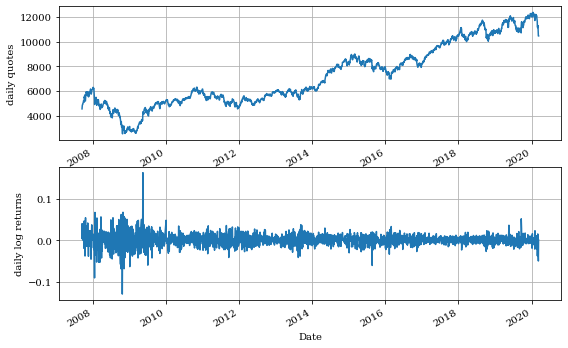

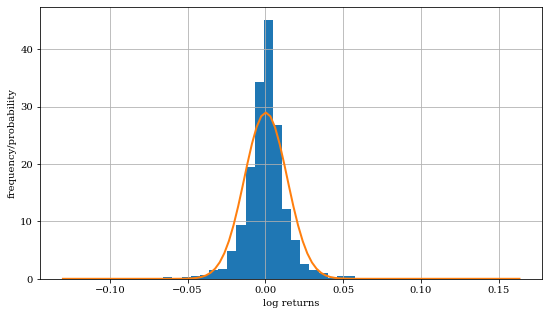

<Figure size 648x360 with 0 Axes>

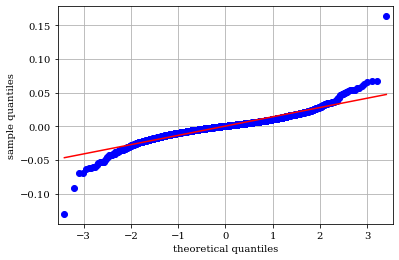

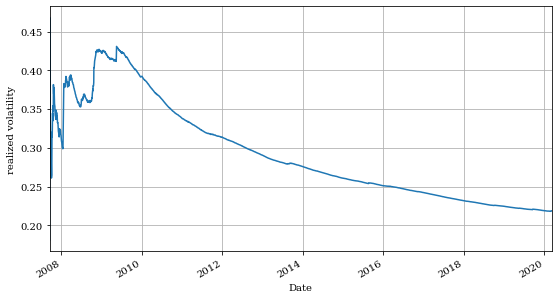

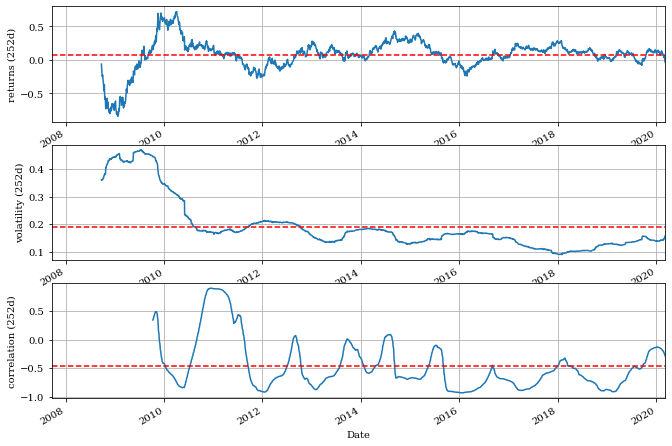

In [15]:
generate_index()